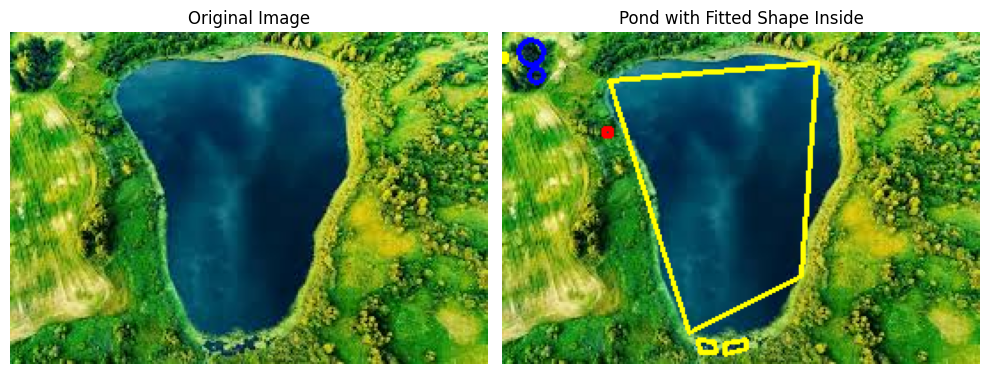

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/pond.jpeg')

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Color-based segmentation (assume the pond is blue-ish)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for blue color (adjust these ranges depending on the actual image)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask for the blue color
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Step 2: Thresholding to isolate the pond
ret, mask_thresh = cv2.threshold(mask_blue, 127, 255, cv2.THRESH_BINARY)

# Step 3: Apply dilation to ensure that the region inside the pond is included in the mask
kernel = np.ones((5, 5), np.uint8)
mask_dilated = cv2.dilate(mask_thresh, kernel, iterations=1)

# Step 4: Find contours in the dilated mask to ensure we're getting the region inside the pond
contours, _ = cv2.findContours(mask_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the contours and shapes
image_with_shapes = image_rgb.copy()

# Step 5: Fit shapes inside the contours, only where the mask is white (inside the pond)
for contour in contours:
    # Check if the contour lies within the pond region (mask is white)
    mask_contour = np.zeros_like(mask_dilated)
    cv2.drawContours(mask_contour, [contour], -1, 255, thickness=cv2.FILLED)

    # Check if the contour is entirely inside the pond (i.e., mask is 255)
    if cv2.countNonZero(cv2.bitwise_and(mask_contour, mask_dilated)) > 0:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)  # Adjust epsilon for shape fitting
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check the number of vertices of the approximated contour to decide on the shape
        if len(approx) == 3:
            # Triangle
            cv2.drawContours(image_with_shapes, [approx], -1, (0, 255, 0), 2)  # Green triangle
        elif len(approx) == 4:
            # Rectangle or Square (check aspect ratio)
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.8 < aspect_ratio < 1.2:
                # Square
                cv2.drawContours(image_with_shapes, [approx], -1, (255, 0, 0), 2)  # Blue square
            else:
                # Rectangle
                cv2.drawContours(image_with_shapes, [approx], -1, (255, 255, 0), 2)  # Yellow rectangle
        else:
            # Circle (fit circle to the contour)
            (x, y), radius = cv2.minEnclosingCircle(contour)
            cv2.circle(image_with_shapes, (int(x), int(y)), int(radius), (0, 0, 255), 2)  # Red circle

# Display the results
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the image with the fitted shapes
plt.subplot(1, 2, 2)
plt.imshow(image_with_shapes)
plt.title("Pond with Fitted Shape Inside")
plt.axis('off')

plt.tight_layout()
plt.show()


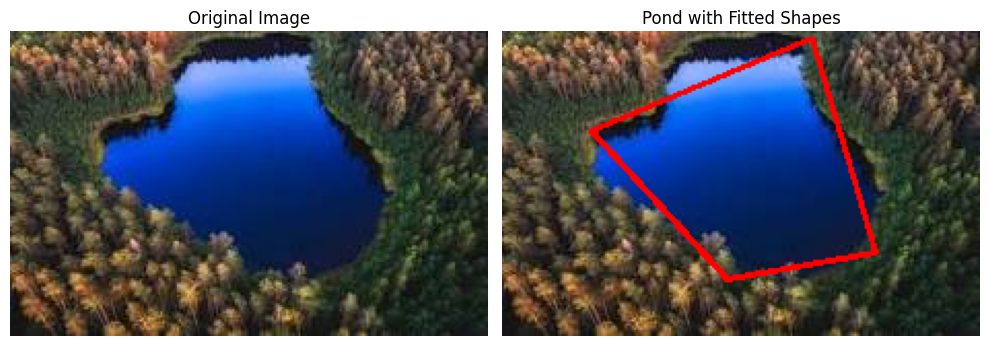

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/d3402288-253a-4d33-a7c4-6bf079a5e8b9.jpg')

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Color-based segmentation (assume the pond is blue-ish)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for blue color (adjust these ranges depending on the actual image)
lower_blue = np.array([90, 50, 50])  # Lower range for blue in HSV
upper_blue = np.array([130, 255, 255])  # Upper range for blue in HSV

# Create a mask for the blue color
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Step 2: Apply Gaussian blur to smooth the mask
mask_blurred = cv2.GaussianBlur(mask_blue, (5, 5), 0)

# Step 3: Thresholding to isolate the pond
ret, mask_thresh = cv2.threshold(mask_blurred, 127, 255, cv2.THRESH_BINARY)

# Step 4: Apply dilation to ensure that the region inside the pond is included in the mask
kernel = np.ones((5, 5), np.uint8)
mask_dilated = cv2.dilate(mask_thresh, kernel, iterations=2)

# Step 5: Find contours in the dilated mask to ensure we're getting the region inside the pond
contours, _ = cv2.findContours(mask_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area threshold
contours = [contour for contour in contours if cv2.contourArea(contour) > 500]  # Adjust area threshold

# Create a copy of the original image to draw the contours and shapes
image_with_shapes = image_rgb.copy()

# Step 6: Fit shapes inside the contours
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.04 * cv2.arcLength(contour, True)  # Adjust epsilon for shape fitting
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check the number of vertices of the approximated contour to decide on the shape
    if len(approx) == 3:
        # Triangle
        cv2.drawContours(image_with_shapes, [approx], -1, (0, 255, 0), 2)  # Green triangle
    elif len(approx) == 4:
        # Rectangle or Square (check aspect ratio)
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.8 < aspect_ratio < 1.2:
            # Square
            cv2.drawContours(image_with_shapes, [approx], -1, (255, 0, 0), 2)  # Blue square
        else:
            # Rectangle
            cv2.drawContours(image_with_shapes, [approx], -1, (255, 255, 0), 2)  # Yellow rectangle
    else:
        # Circle (fit circle to the contour)
        (x, y), radius = cv2.minEnclosingCircle(contour)
        cv2.circle(image_with_shapes, (int(x), int(y)), int(radius), (0, 0, 255), 2)  # Red circle

# Display the results
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the image with the fitted shapes
plt.subplot(1, 2, 2)
plt.imshow(image_with_shapes)
plt.title("Pond with Fitted Shapes")
plt.axis('off')

plt.tight_layout()
plt.show()


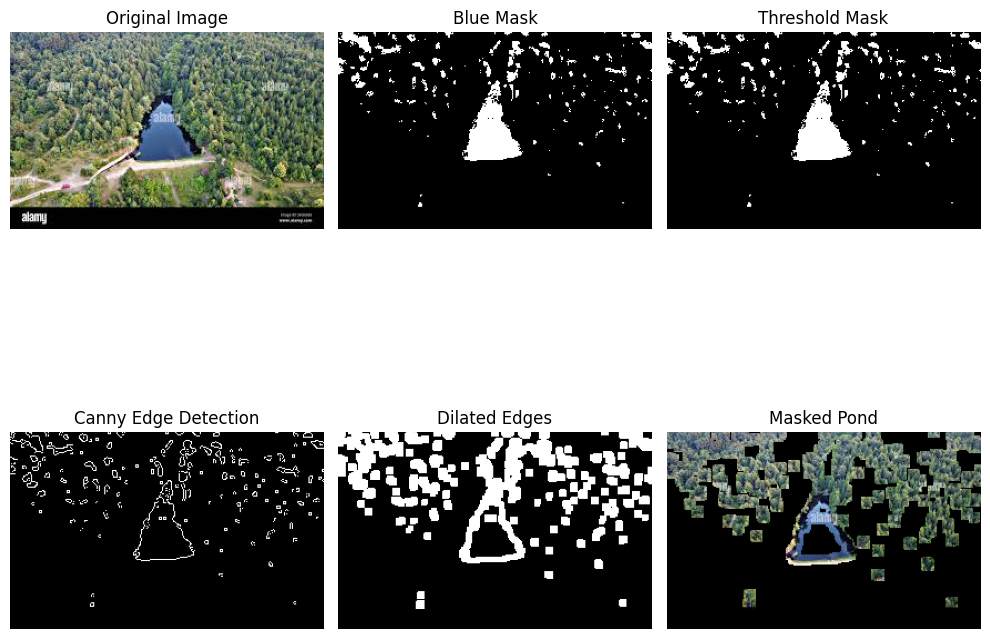

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Color-based segmentation (assume the pond is blue-ish)
# Convert the image to HSV color space for better color segmentation
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for blue color (adjust these ranges depending on the actual image)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask for the blue color
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Step 2: Thresholding to isolate the pond
# You can adjust this threshold to isolate the pond area more accurately
ret, mask_thresh = cv2.threshold(mask_blue, 127, 255, cv2.THRESH_BINARY)

# Step 3: Edge detection using Canny
# We apply Canny edge detection on the masked image to detect the pond boundary
edges = cv2.Canny(mask_thresh, threshold1=100, threshold2=200)

# Step 4: Post-processing to enhance the edges and remove noise
# We can use morphological operations (like dilation) to fill gaps and smooth edges
kernel = np.ones((5, 5), np.uint8)  # Define a kernel for morphological operations
edges_dilated = cv2.dilate(edges, kernel, iterations=1)  # Dilation to enhance edges

# Optional: Apply a Gaussian blur to smooth the edges
edges_blurred = cv2.GaussianBlur(edges_dilated, (5, 5), 0)

# Step 5: Create a masked image where only the pond is visible
# We use the edges to create a masked version of the original image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=edges_blurred)

# Show the results
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the blue mask
plt.subplot(2, 3, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title("Blue Mask")
plt.axis('off')

# Display the thresholded mask
plt.subplot(2, 3, 3)
plt.imshow(mask_thresh, cmap='gray')
plt.title("Threshold Mask")
plt.axis('off')

# Display the Canny edge detection result
plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Display the dilated edges
plt.subplot(2, 3, 5)
plt.imshow(edges_dilated, cmap='gray')
plt.title("Dilated Edges")
plt.axis('off')

# Display the final masked image
plt.subplot(2, 3, 6)
plt.imshow(masked_image)
plt.title("Masked Pond")
plt.axis('off')

plt.tight_layout()
plt.show()
